# Setup de Colab

Ejecutar estas celdas si estamos trabajando desde Colab

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os

# os.chdir('/content/drive/MyDrive/Colab Notebooks/ProyectoPredicción/ProyectoBookings/SRC')

# SETUP

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, f_oneway
import warnings
from scipy.stats import chi2_contingency


warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Carga del CSV

In [4]:
df = pd.read_csv('../Data/hotel_bookings.csv')

# Preview de Datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Diccionario de Datos

| Variable                           | Descripción                                           | Valores/Notas                                                   |
|------------------------------------|------------------------------------------------------|----------------------------------------------------------------|
| hotel                              | Tipo de hotel                                       | Resort Hotel o City Hotel                                      |
| is_canceled                        | Indica si la reserva fue cancelada                 | 1 = Cancelada, 0 = No cancelada                               |
| lead_time                          | Número de días entre la fecha de reserva y la fecha de llegada |                                                                |
| arrival_date_year                  | Año de la fecha de llegada                          |                                                                |
| arrival_date_month                 | Mes de la fecha de llegada                          |                                                                |
| arrival_date_week_number           | Número de la semana en que se produce la llegada   |                                                                |
| arrival_date_day_of_month          | Día del mes de la fecha de llegada                 |                                                                |
| stays_in_weekend_nights            | Número de noches de fin de semana reservadas       |                                                                |
| stays_in_week_nights               | Número de noches entre semana reservadas           |                                                                |
| adults                             | Número de adultos incluidos en la reserva         |                                                                |
| children                           | Número de niños incluidos en la reserva           |                                                                |
| babies                             | Número de bebés incluidos en la reserva           |                                                                |
| meal                               | Plan de comidas reservado                          | BB (desayuno), HB (media pensión), FB (pensión completa), SC (sin comidas) o Undefined |
| country                            | País de origen de los huéspedes (código ISO de dos letras) |                                                                |
| market_segment                     | Segmento de mercado al que pertenece la reserva   | Ej.: Direct, Corporate, Online TA, entre otros                |
| distribution_channel               | Canal de distribución a través del cual se realizó la reserva | Ej.: Direct, TA/TO, Corporate, etc.                            |
| is_repeated_guest                  | Indica si el huésped es repetido                   | 1 = Repetido, 0 = Nuevo                                       |
| previous_cancellations             | Número de reservas previas canceladas por el cliente |                                                            |
| previous_bookings_not_canceled      | Número de reservas previas no canceladas por el cliente |                                                            |
| reserved_room_type                 | Código del tipo de habitación reservado            |                                                                |
| assigned_room_type                 | Código del tipo de habitación asignado efectivamente al huésped |                                                            |
| booking_changes                    | Número de cambios realizados en la reserva después de su confirmación inicial |                           |
| deposit_type                       | Tipo de depósito efectuado para la reserva        | No Deposit, Non Refund, Refundable                           |
| agent                              | Identificador de la agencia de viajes que gestionó la reserva (si aplica) | Puede estar vacío                                             |
| company                            | Identificador de la empresa asociada a la reserva (si aplica) | Puede estar vacío                                             |
| days_in_waiting_list               | Número de días que la reserva estuvo en lista de espera antes de confirmarse |                        |
| customer_type                      | Tipo de cliente o reserva                         | Ej.: Transient, Contract, Group, Transient-Party             |
| adr                                | Tarifa diaria promedio (Average Daily Rate)       | Calculada como el total de ingresos dividido por el número total de noches |
| required_car_parking_spaces        | Número de plazas de aparcamiento solicitadas por el cliente |                                                           |
| total_of_special_requests          | Número de solicitudes especiales realizadas por el cliente | Ej.: petición de cama extra, habitación en piso alto, etc. |
| reservation_status                 | Estado final de la reserva                        | Check-Out, Canceled o No-Show                               |
| reservation_status_date            | Fecha en la que se registró el estado final de la reserva |                                                           |



In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df['is_canceled'] = df['is_canceled'].astype('object')
df['company'] = df['company'].astype('object')
df['agent'] = df['agent'].astype('object')

In [8]:
df_numeric = df.select_dtypes(exclude='object')
df_object = df.select_dtypes(include='object')

In [9]:
print('Columnas numericas')
print(df_numeric.columns)
print('Columnas categoricas')
print(df_object.columns)

Columnas numericas
Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Columnas categoricas
Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'company',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')


In [10]:
df_numeric.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df_object.describe()

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,118902,119390,119390,119390,119390,119390,103050.0,6797.0,119390,119390,119390
unique,2,2,12,5,177,8,5,10,12,3,333.0,352.0,4,3,926
top,City Hotel,0,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,40.0,Transient,Check-Out,2015-10-21
freq,79330,75166,13877,92310,48590,56477,97870,85994,74053,104641,31961.0,927.0,89613,75166,1461


# Analisis Univariado


## Numericas:

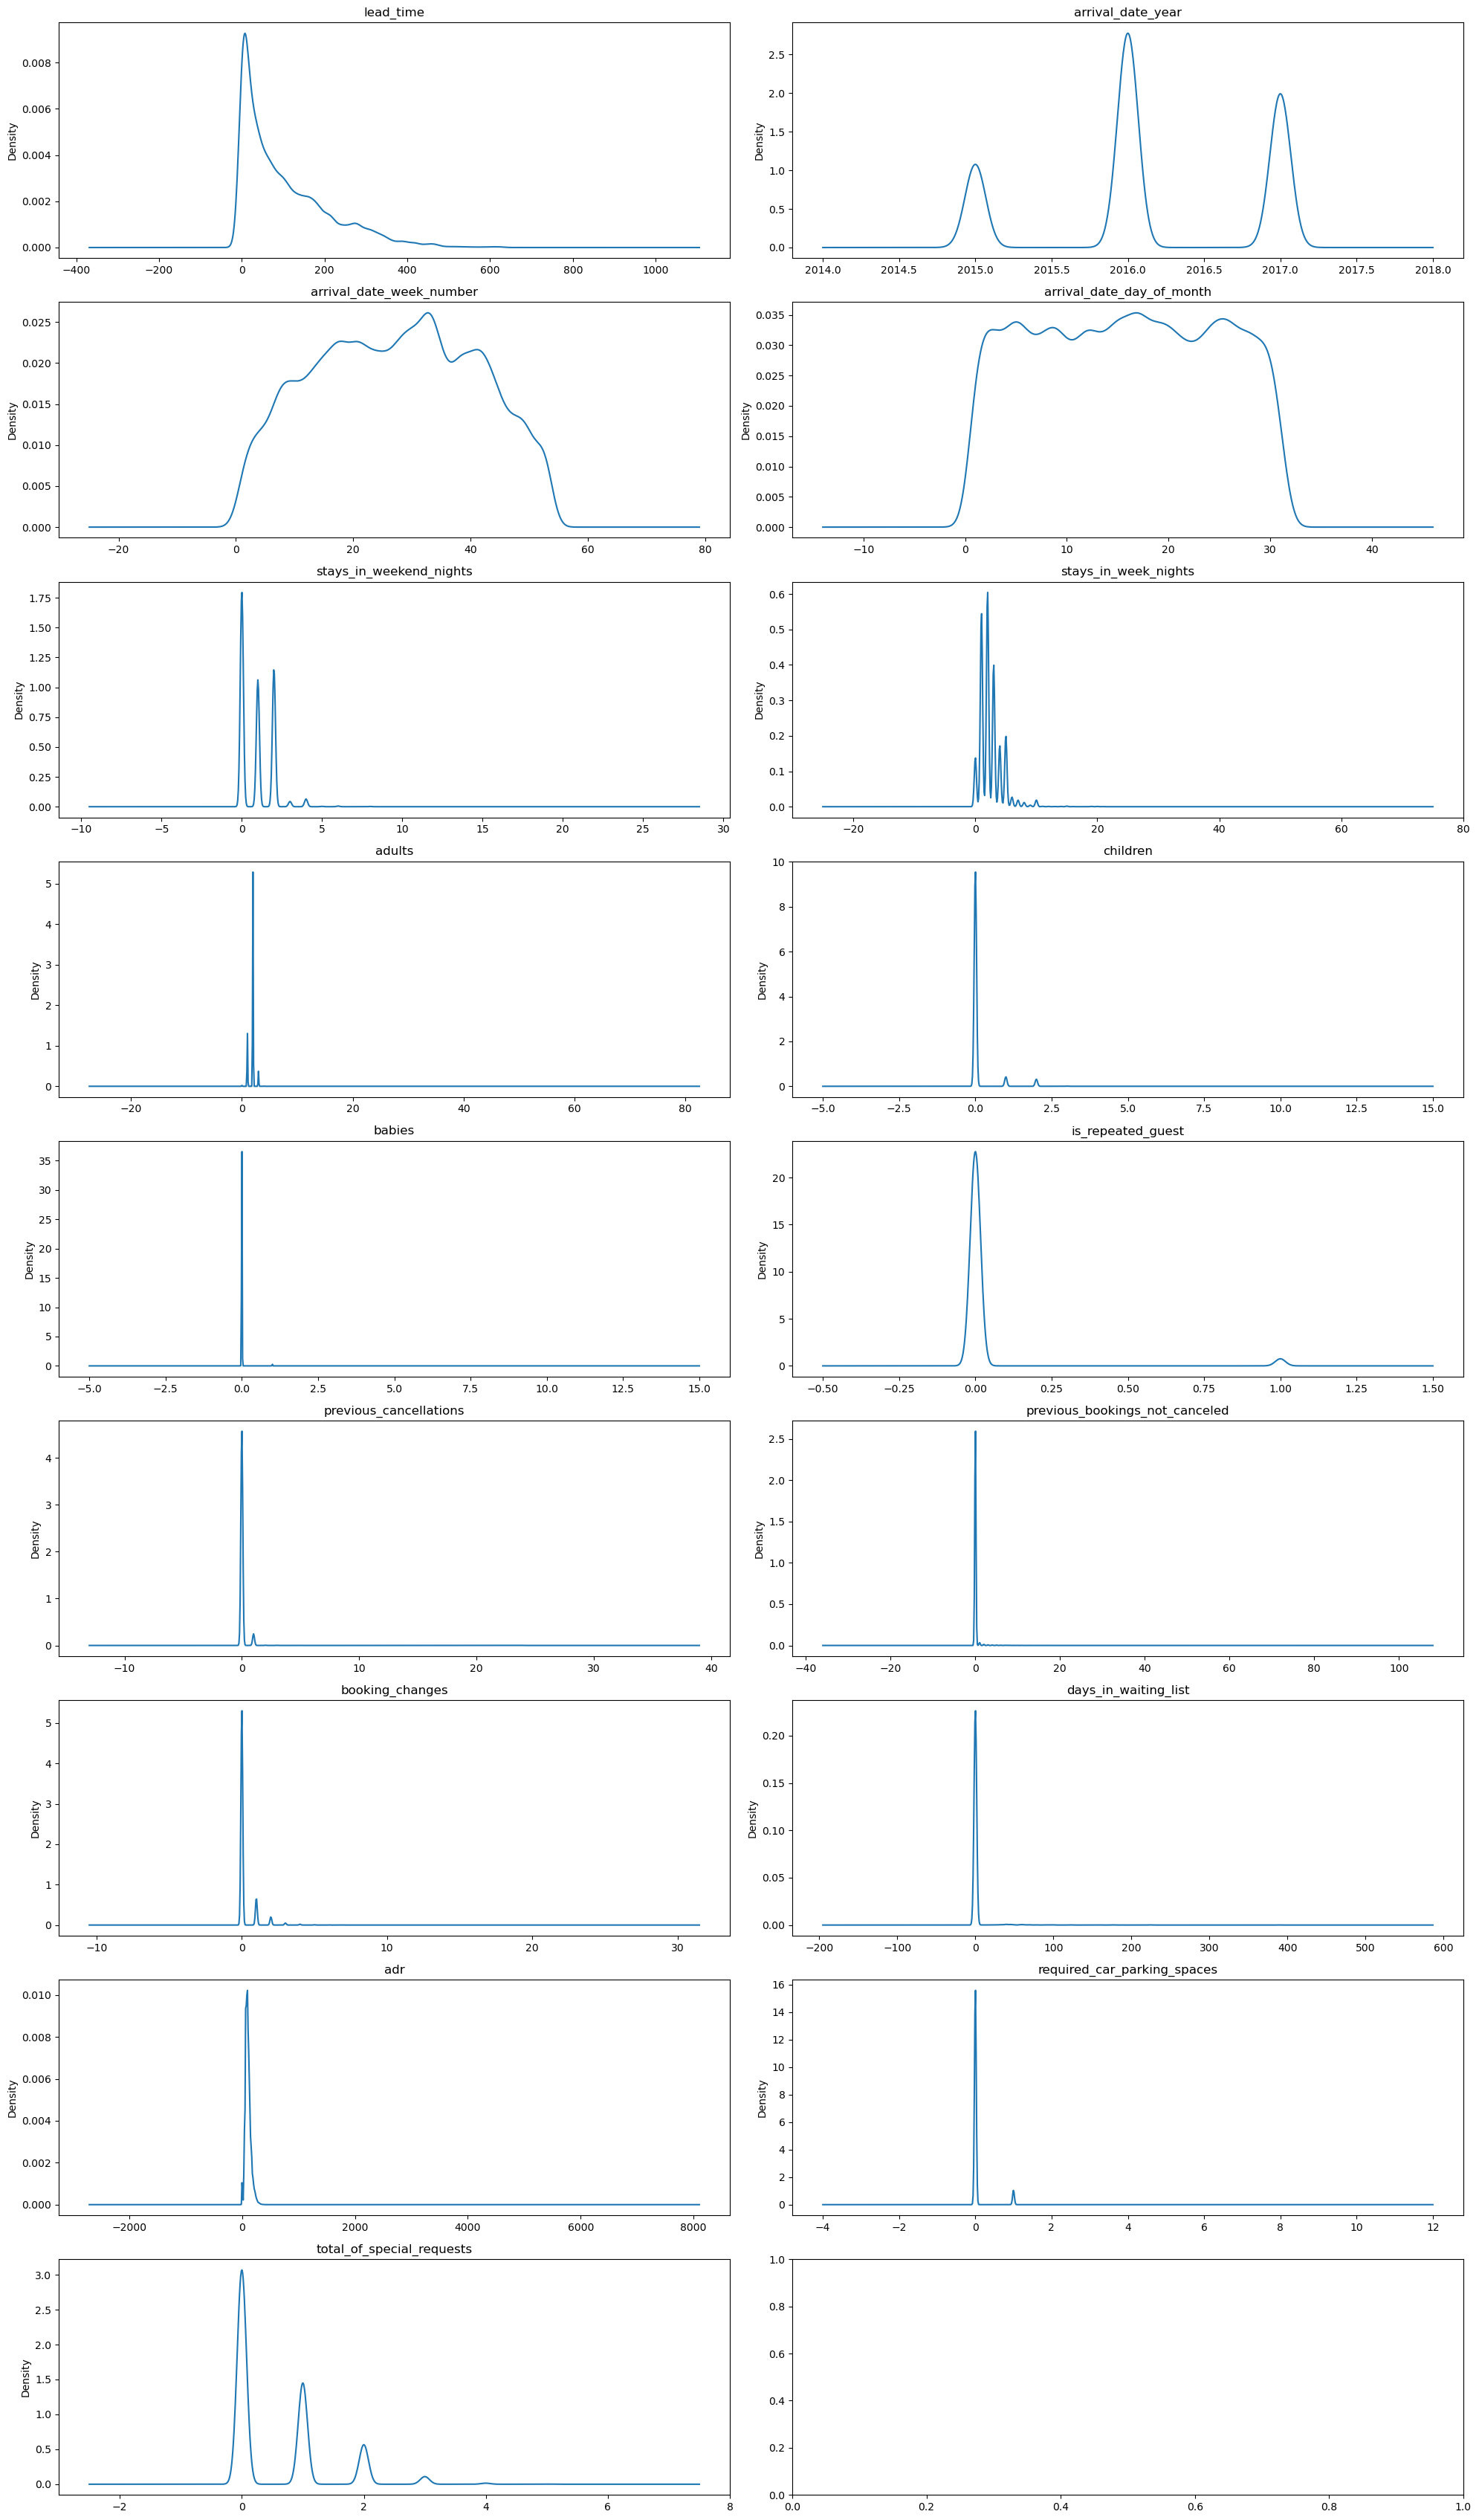

In [12]:

nrow = int(len(df_numeric.columns)/2) + 1
altura = len(df_numeric.columns)
ncol = 2
num_plots = altura

fig, axes = plt.subplots(nrow, ncol,figsize=(20,2*altura))
axes = axes.flatten()
for i, column in enumerate(df_numeric.columns):
    df_numeric[column].plot.density(ax=axes[i], title=column)

plt.tight_layout()
plt.show()

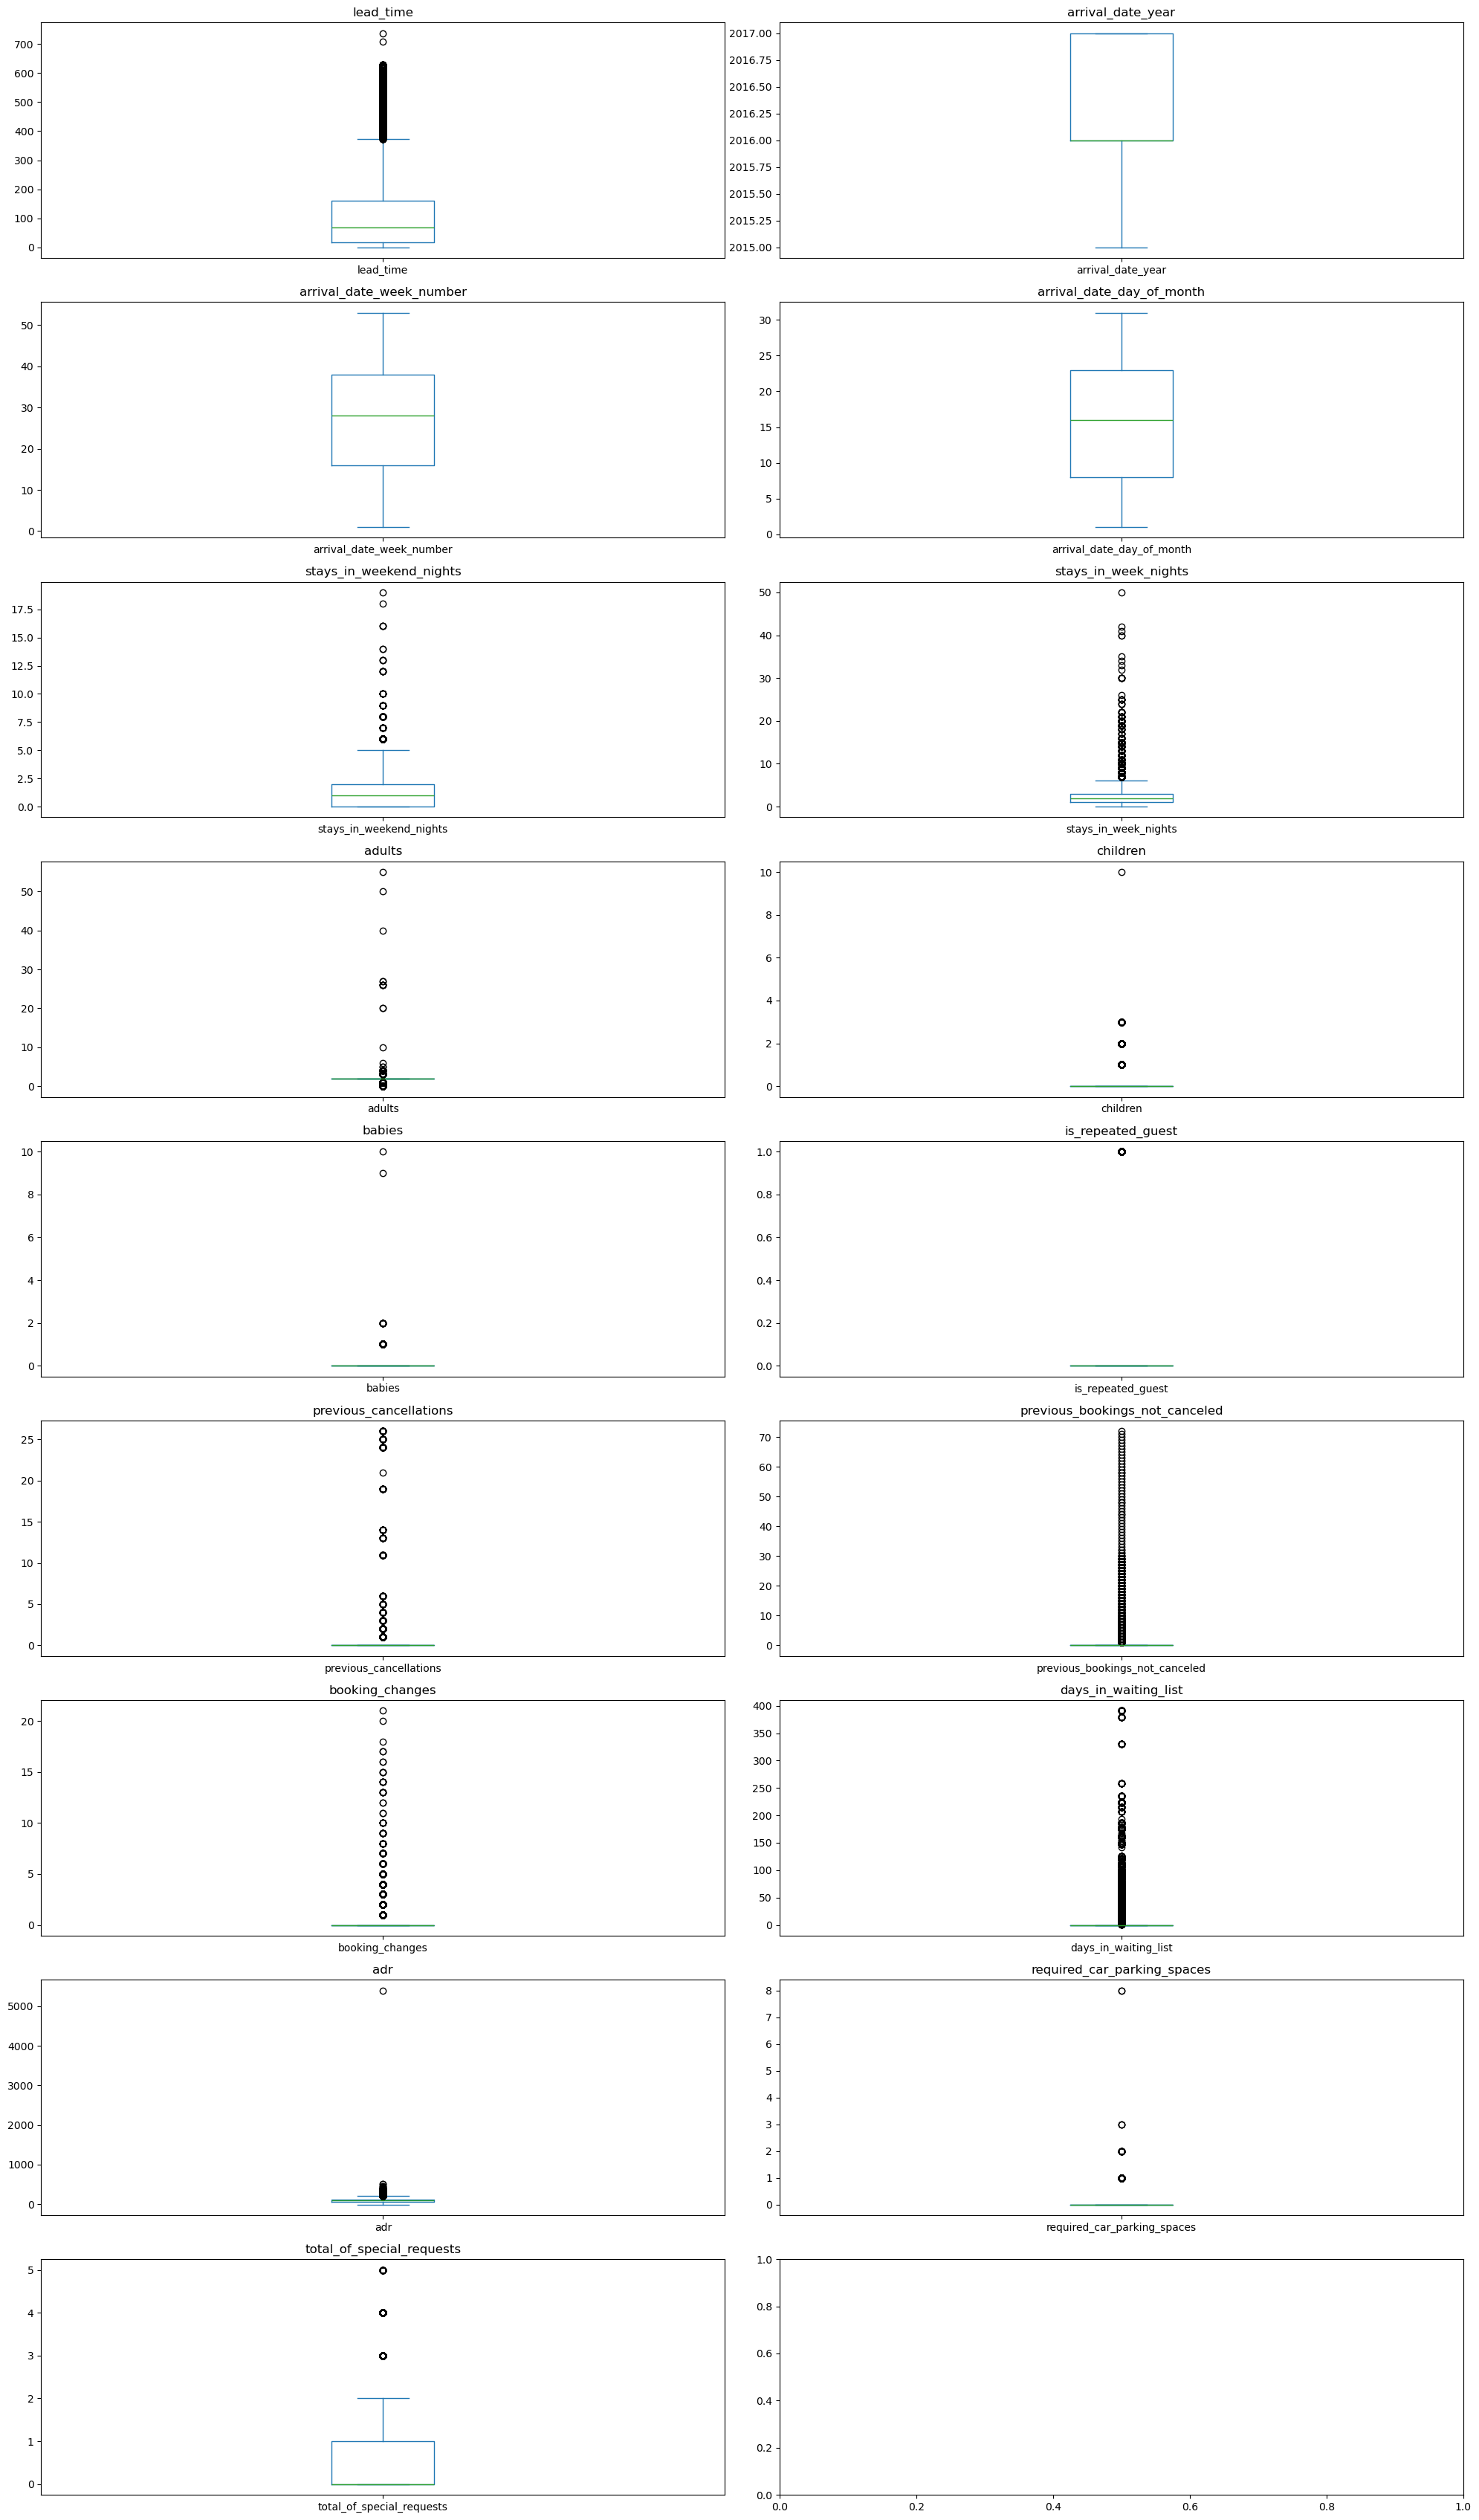

In [13]:
nrow = int(len(df_numeric.columns)/2) + 1
altura = len(df_numeric.columns)
ncol = 2
num_plots = altura

fig, axes = plt.subplots(nrow, ncol,figsize=(20,2*altura))
axes = axes.flatten()
for i, column in enumerate(df_numeric.columns):
    df_numeric[column].plot.box(ax=axes[i], title=column)

plt.tight_layout()
plt.show()

## Categoricas

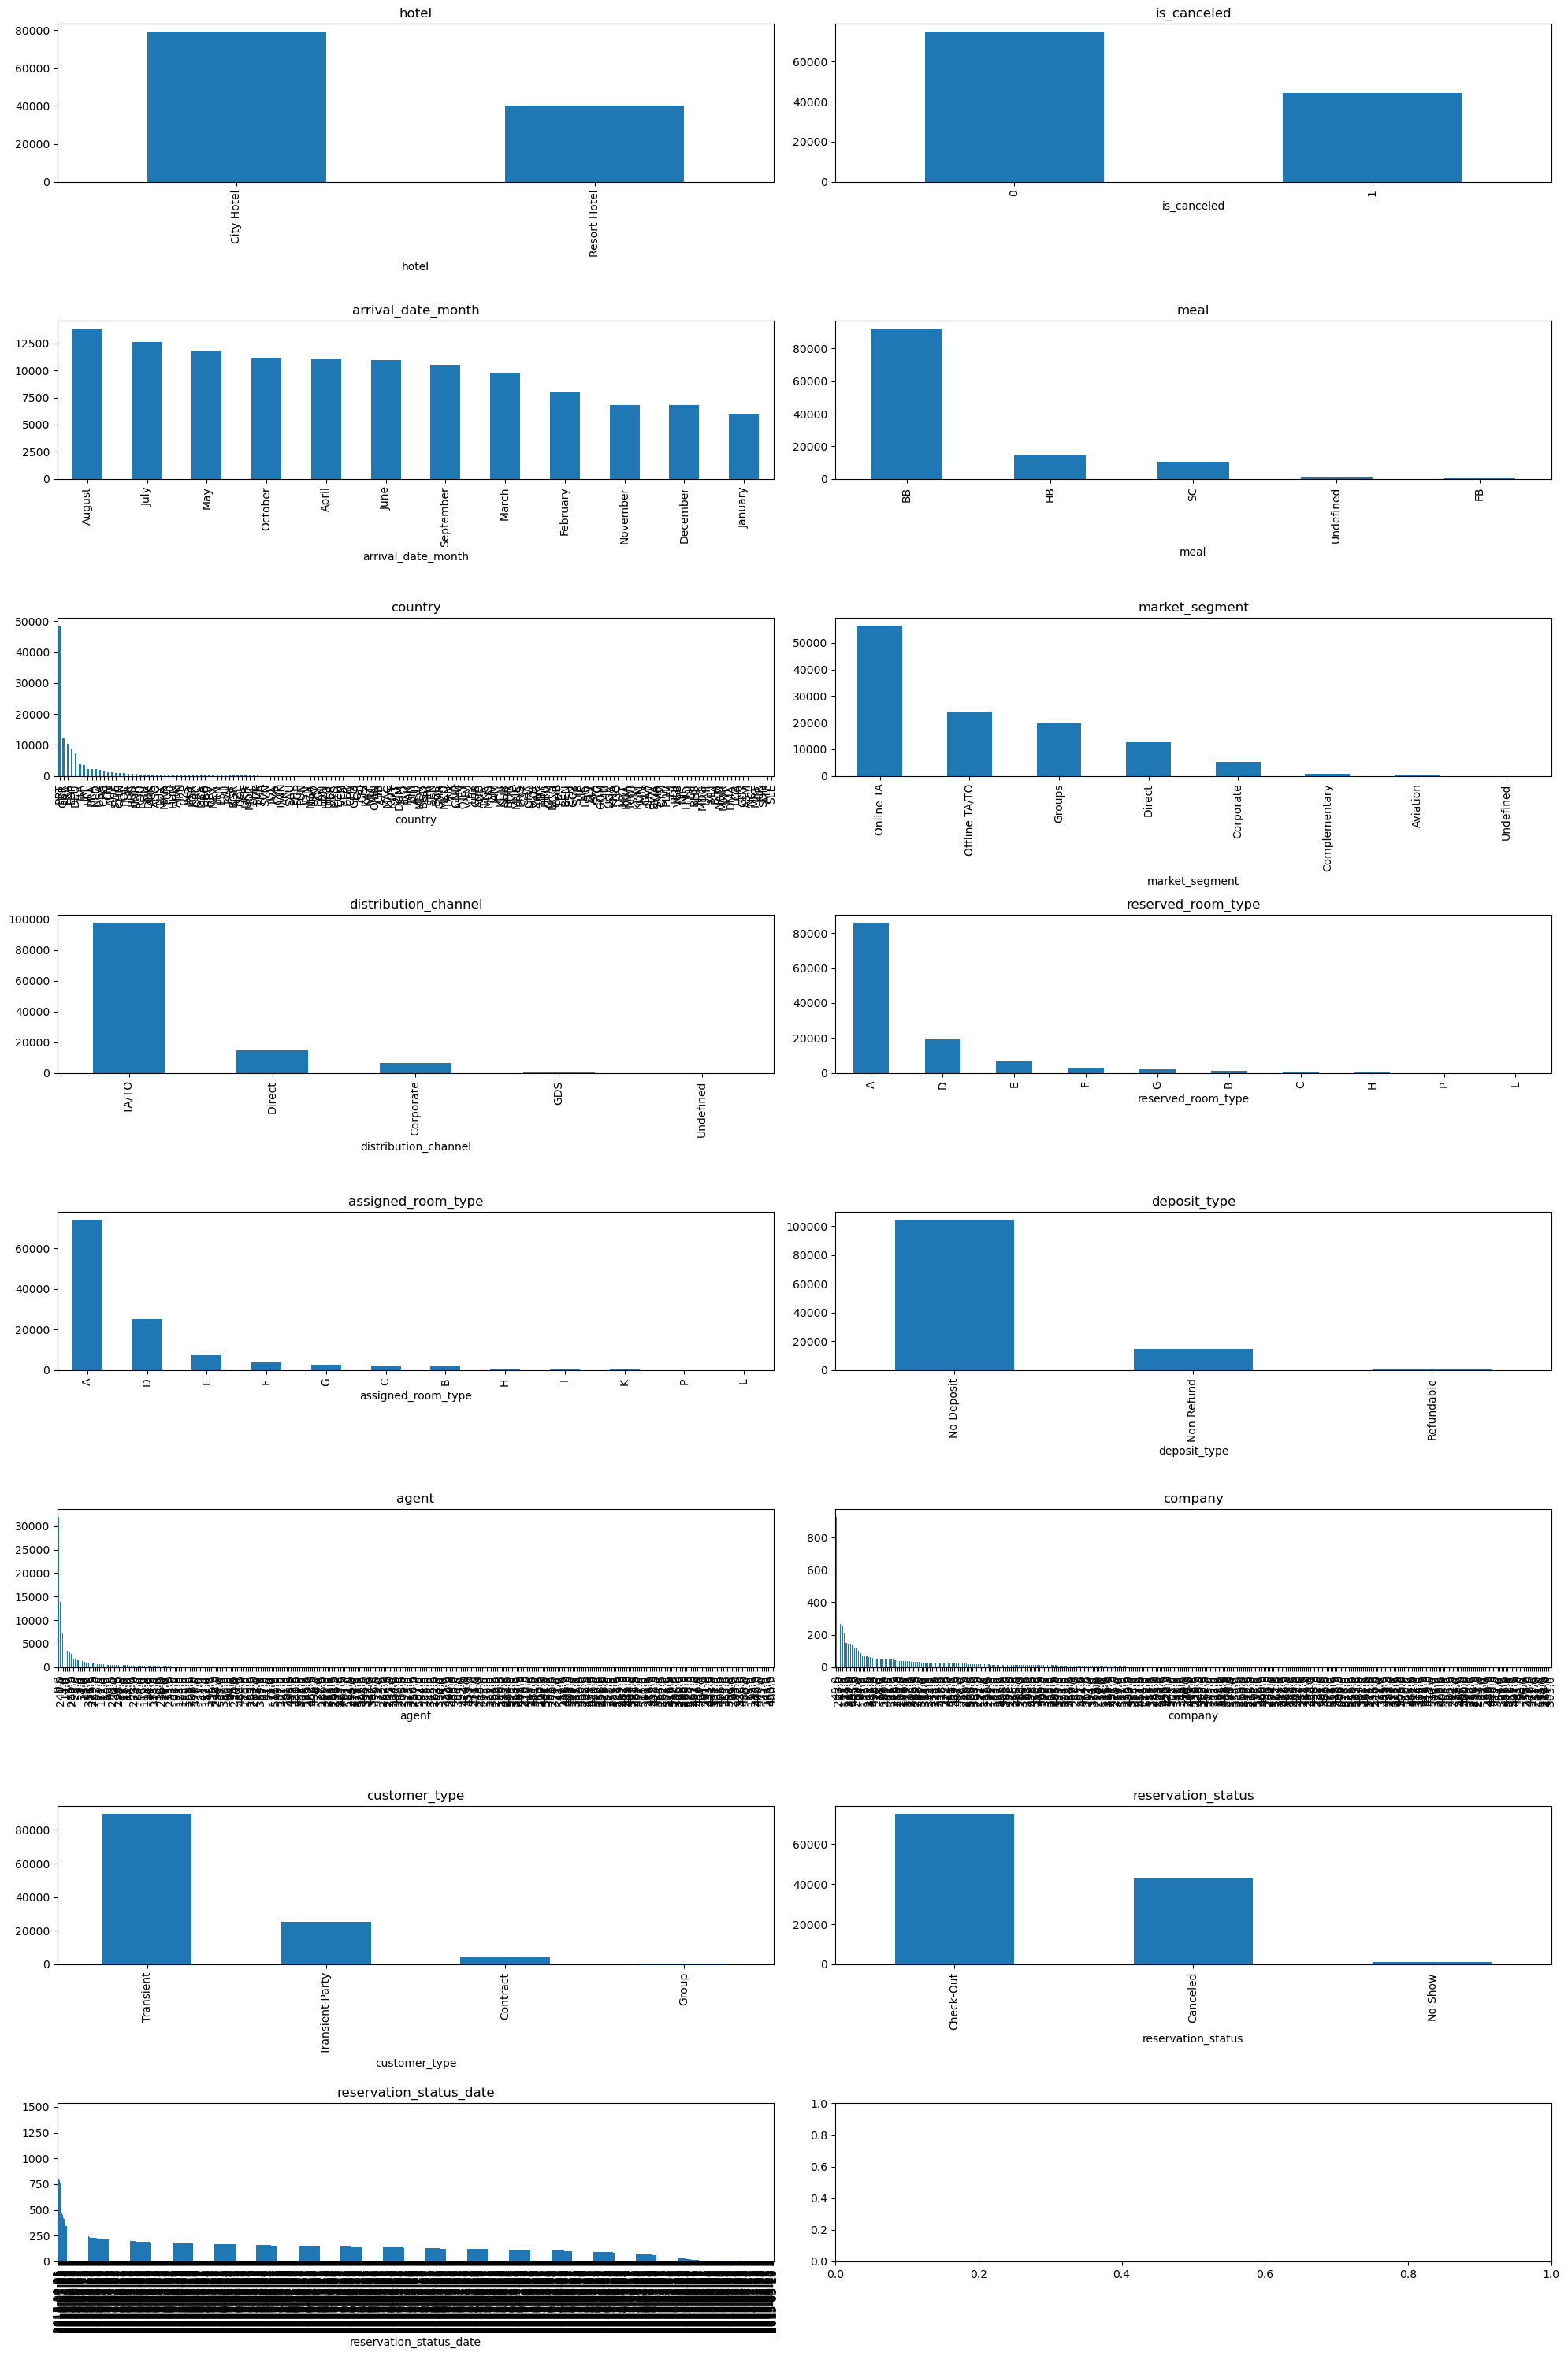

In [14]:

df_object = df.select_dtypes(include=['object'])
ncol = 2
nrow = int((len(df_object.columns)/2))+1
altura = len(df_object.columns)

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 2 * altura))
axes = axes.flatten()

for i, column in enumerate(df_object.columns):
    df_object[column].value_counts().plot.bar(ax=axes[i], title=column)

plt.tight_layout()
plt.show()

``` ```

# Analisis Bivariado

In [15]:
df['is_canceled'].unique()

array([0, 1], dtype=object)

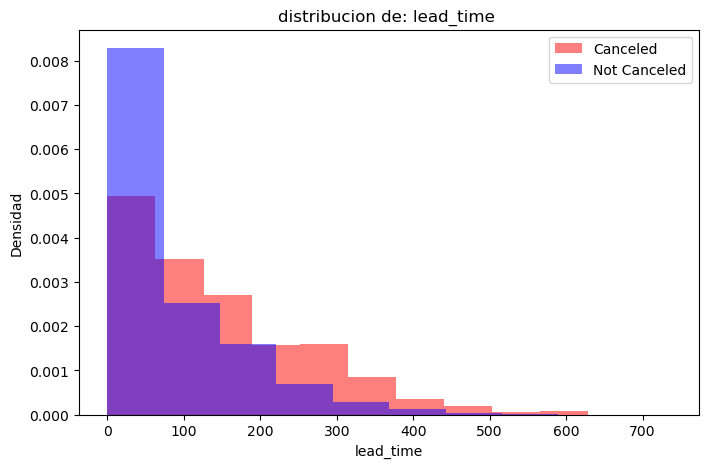

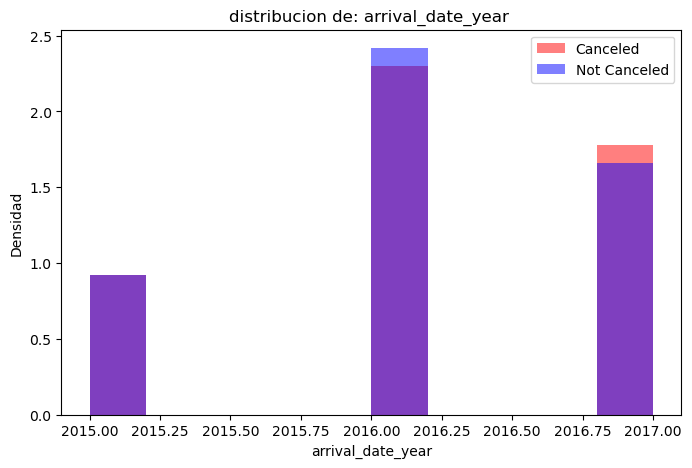

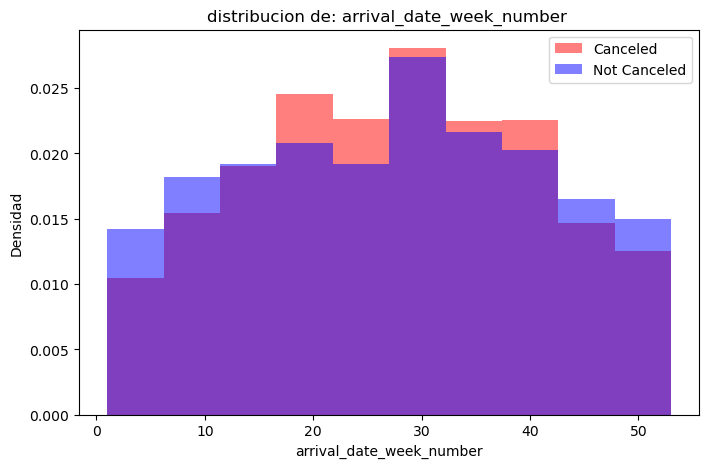

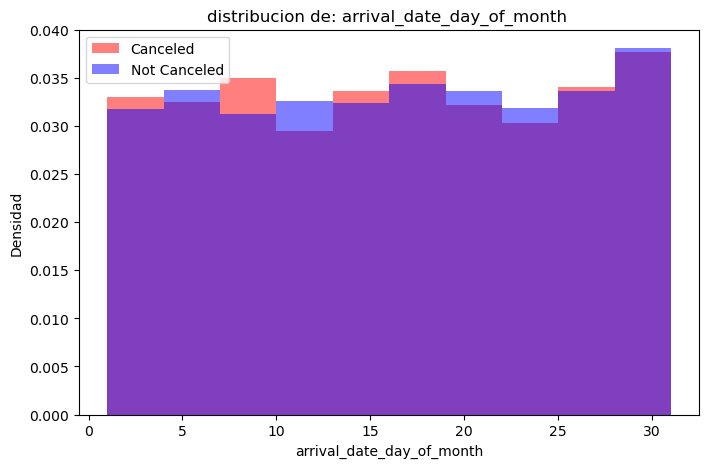

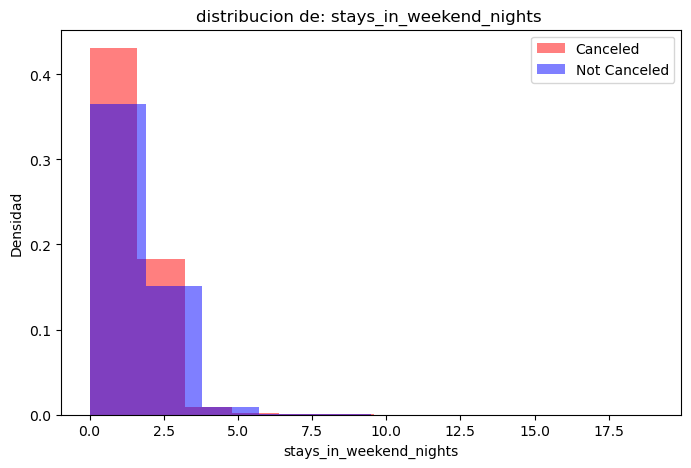

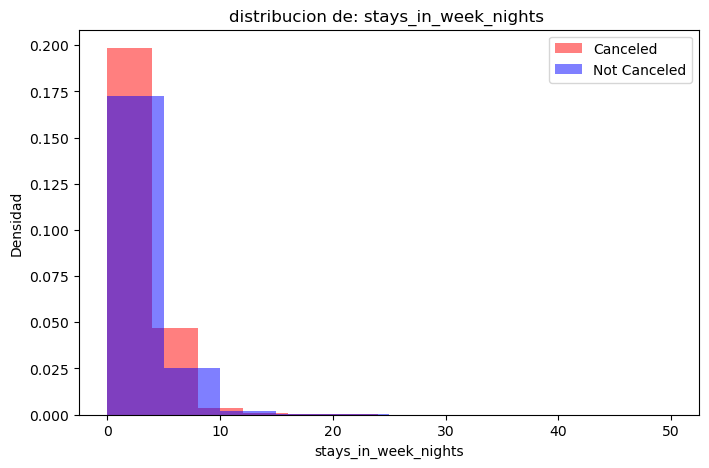

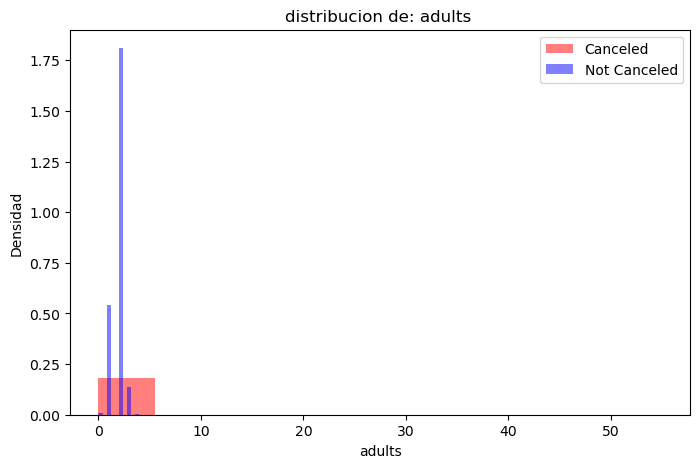

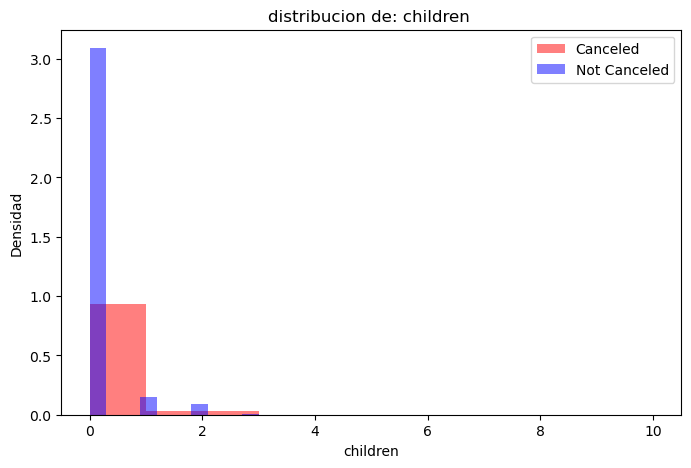

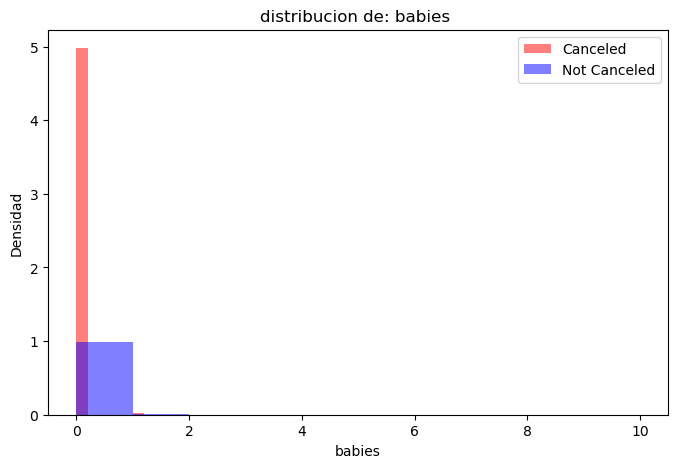

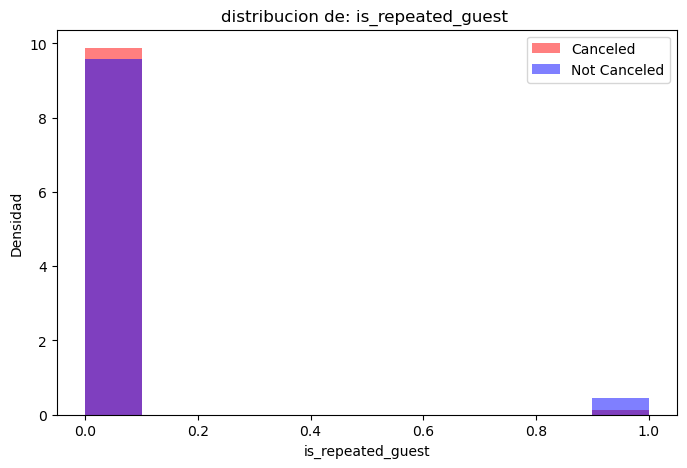

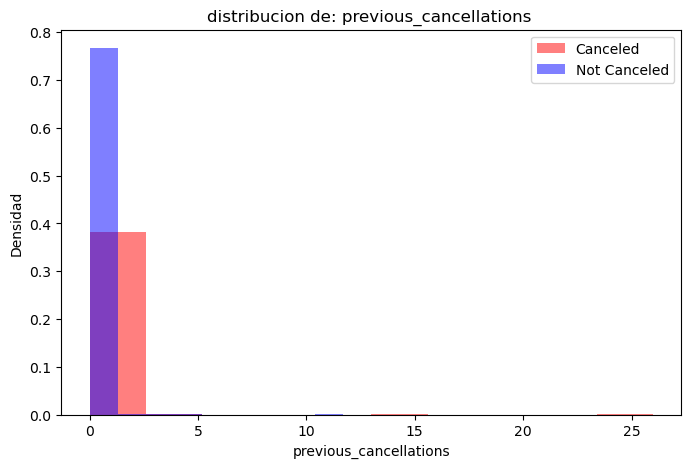

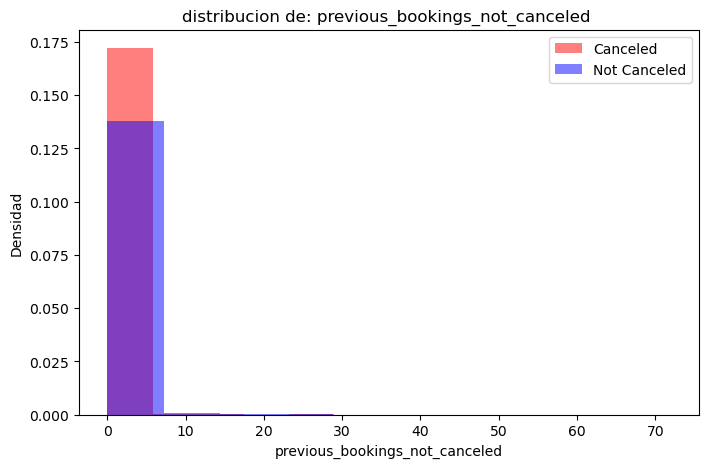

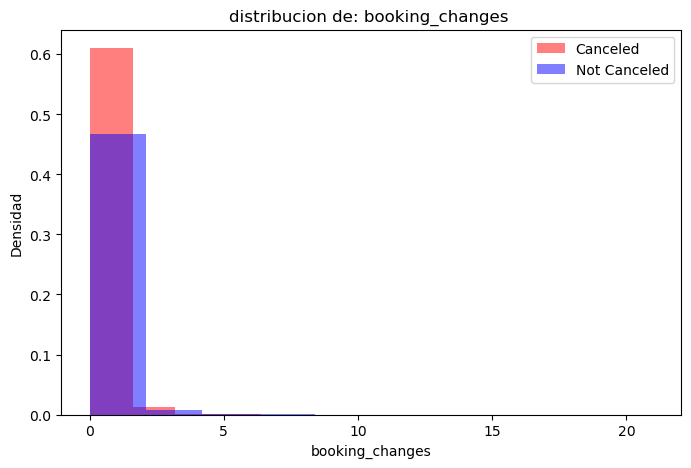

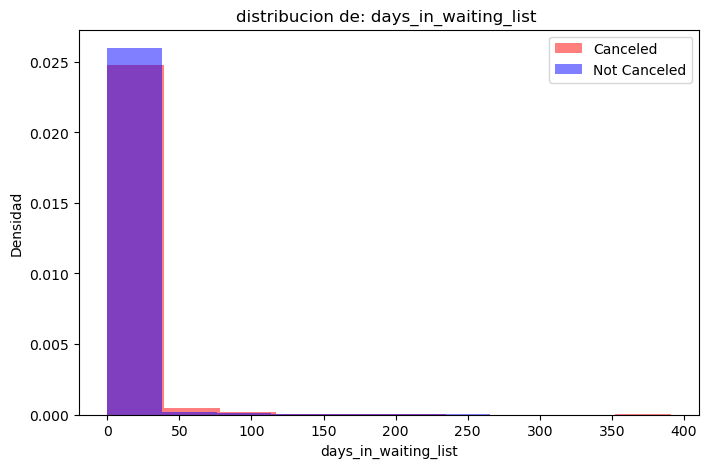

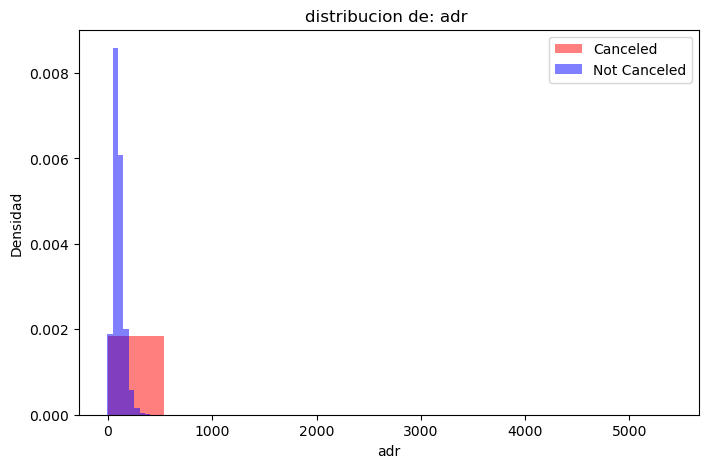

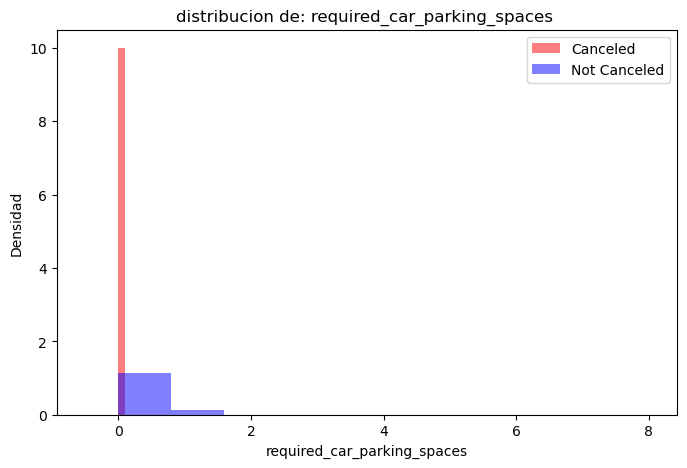

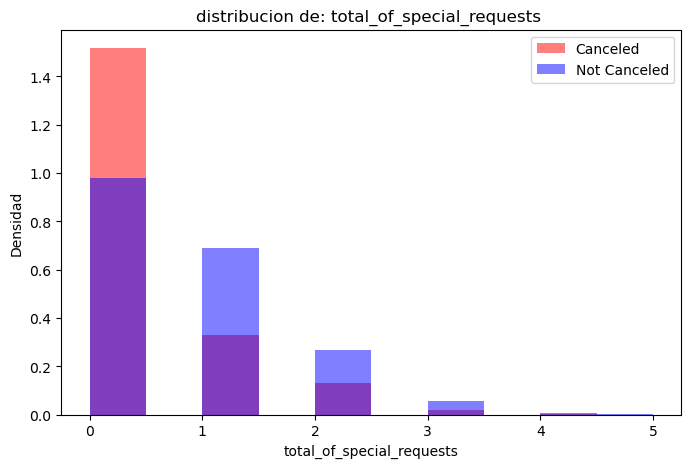

In [16]:
is_canceled = df[df['is_canceled'] == 1]
is_not_canceled = df[df['is_canceled'] == 0]



for column in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(is_canceled[column], alpha=0.5, density=True, color='red', label='Canceled')
    plt.hist(is_not_canceled[column],alpha=0.5, density=True, color='blue', label='Not Canceled')

    plt.title(f"distribucion de: {column} ")
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.legend()

    plt.show()


``` ```

## Analisis Bivariado con Datos Categoricos de Baja Cardinalidad

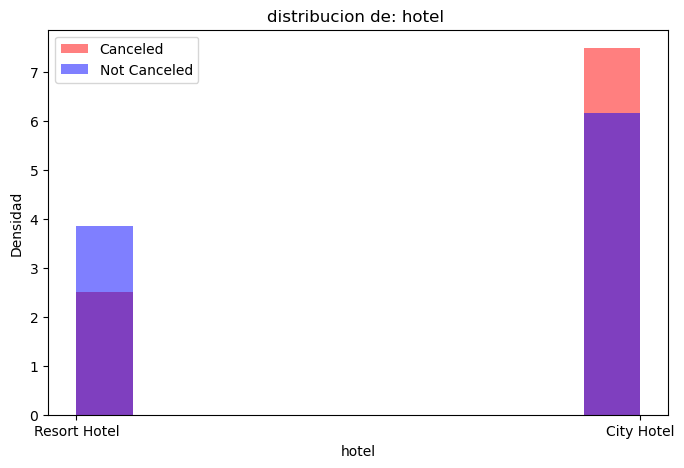

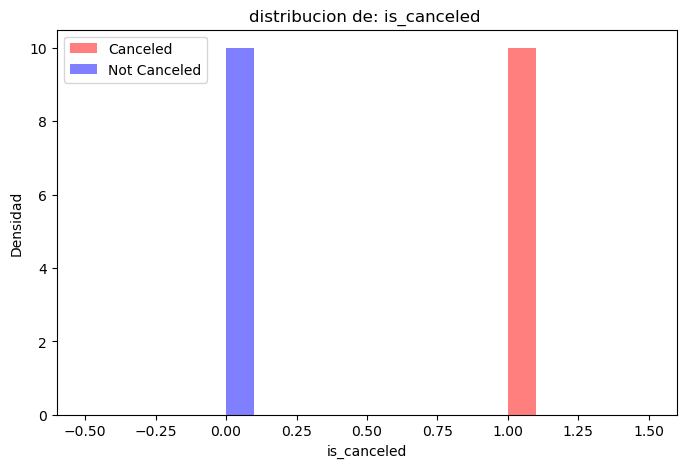

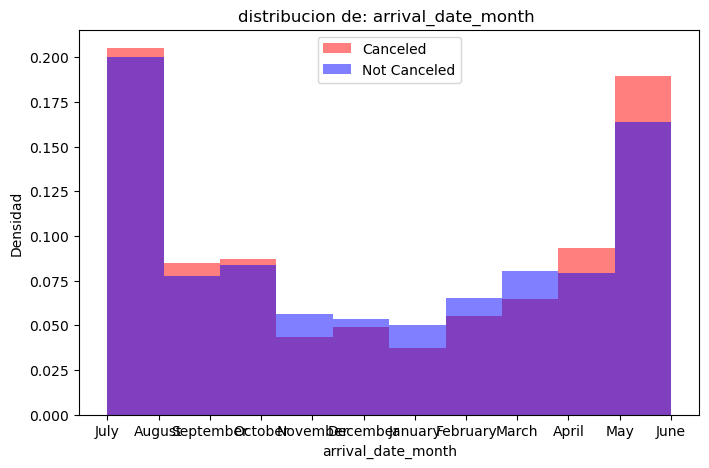

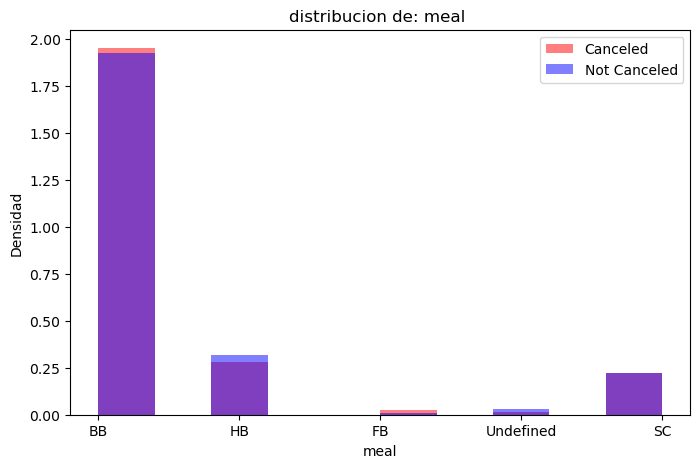

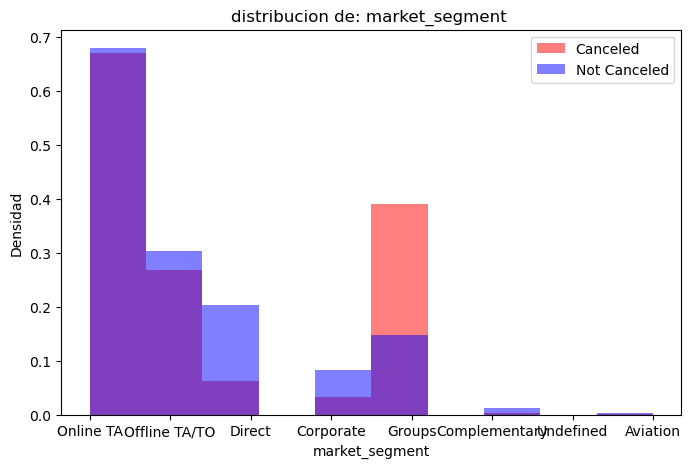

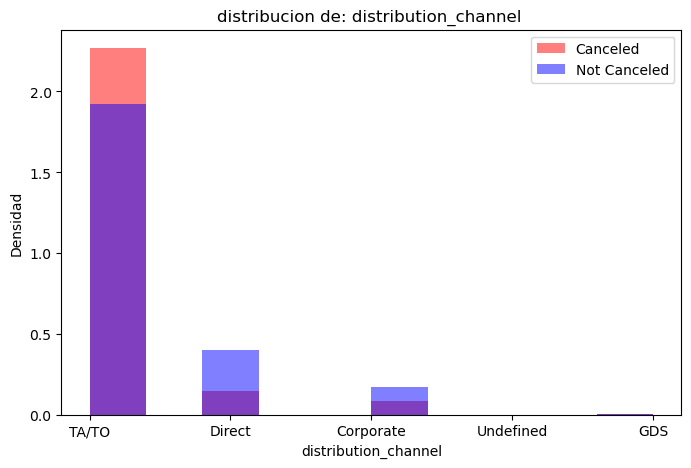

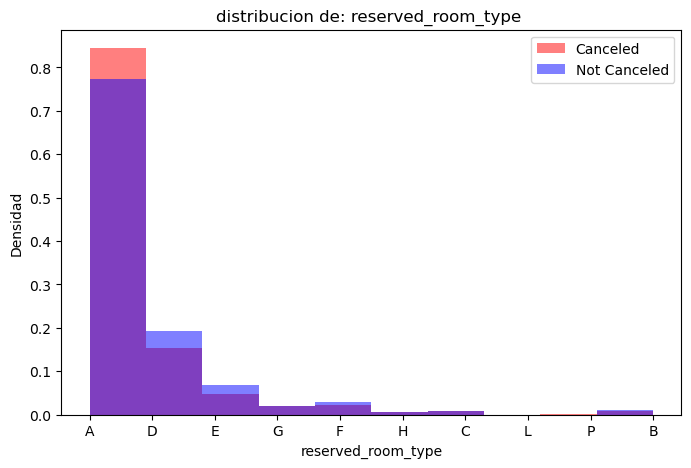

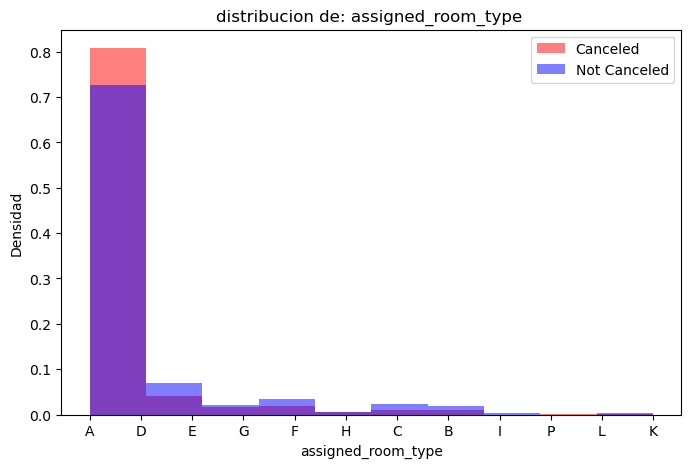

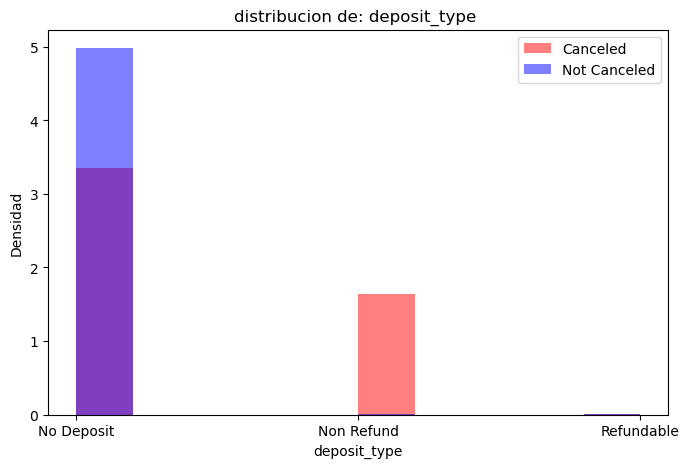

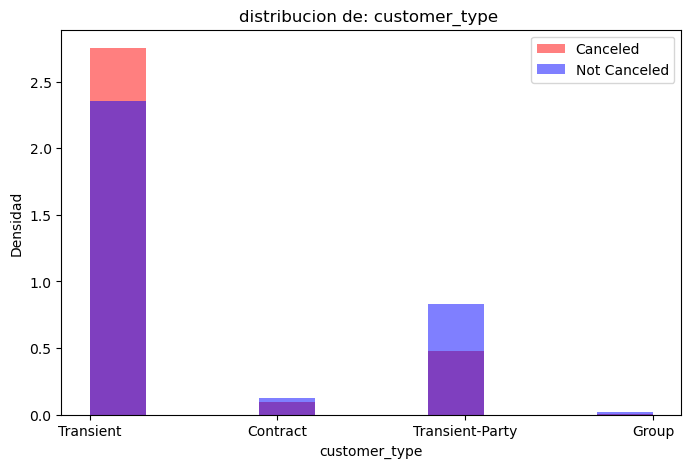

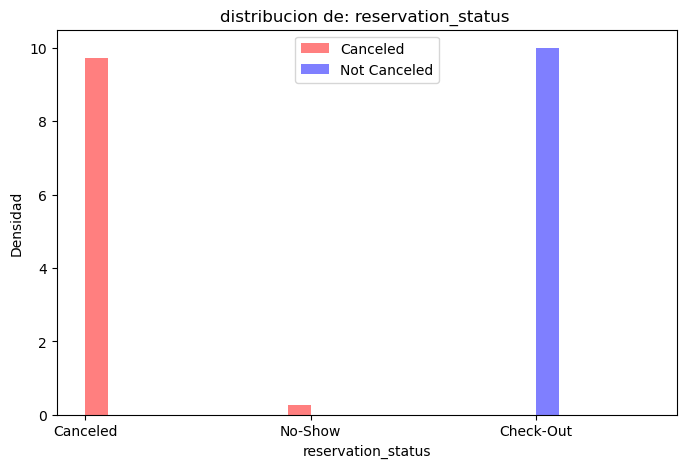

In [17]:
low_card_cat_columns = []
for column in df_object.columns:
  if len(df_object[column].unique()) <= 12:
      low_card_cat_columns.append(column)
      plt.figure(figsize=(8, 5))
      plt.hist(is_canceled[column], alpha=0.5, density=True, color='red', label='Canceled')
      plt.hist(is_not_canceled[column],alpha=0.5, density=True, color='blue', label='Not Canceled')

      plt.title(f"distribucion de: {column} ")
      plt.xlabel(column)
      plt.ylabel("Densidad")
      plt.legend()
      plt.show()
  else:
    continue



# Analisis Multivariante de Correlaciones

In [ ]:
%conda install Jinja2

jinja2 es para los estilos de la matriz de correlaciones

In [23]:
df_correlation_object = df[low_card_cat_columns].copy()
df_correlation_object_1= df_correlation_object.drop(columns=['is_canceled'])
df_correlation_object_ohe = pd.get_dummies(df_correlation_object_1,dtype='int64')

corr_object = pd.concat([df['is_canceled'],df_correlation_object_ohe],axis=1)
corr_object.corr().style.background_gradient(cmap='coolwarm')

,is_canceled,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,1.000000,0.136531,-0.136531,0.024885,0.005343,-0.010524,-0.020212,-0.031073,0.002938,0.029039,-0.030266,0.017989,-0.029544,0.006682,0.013693,0.013124,0.038828,-0.019845,0.001282,-0.025896,-0.013946,-0.039306,-0.081667,-0.154390,0.221859,-0.028472,-0.006288,0.005336,-0.075428,-0.151620,-0.014891,0.175944,0.005757,0.068643,-0.008306,-0.007337,-0.047702,-0.038634,-0.021766,-0.001672,0.005485,-0.000544,0.013071,0.197187,-0.037610,-0.053877,-0.128036,-0.064794,-0.045978,-0.019864,-0.002869,-0.040784,-0.032813,0.003773,0.013071,-0.477911,0.481457,-0.011312,-0.023670,-0.038698,0.133084,-0.124135,0.978435,-1.000000,0.131752
hotel_City Hotel,0.136531,1.000000,-1.000000,0.006832,-0.013157,-0.028593,-0.027975,-0.016624,-0.018709,0.038458,-0.003215,0.023625,-0.012048,0.011555,0.026162,0.041029,-0.105856,-0.173593,0.217039,-0.139934,0.031693,0.010896,-0.045867,-0.131794,0.038688,0.028868,0.043390,0.002909,-0.079408,-0.159572,0.028595,0.180630,0.001858,0.215593,0.068538,-0.122000,-0.047818,-0.217520,-0.015442,-0.122618,-0.100095,-0.009976,0.003586,0.285157,0.075381,-0.180028,-0.079952,-0.216626,-0.048240,-0.122179,-0.108998,-0.077713,0.034392,-0.004073,0.003586,-0.166464,0.172003,-0.042234,-0.039890,-0.023121,-0.005754,0.027812,0.133123,-0.136531,0.020214
hotel_Resort Hotel,-0.136531,-1.000000,1.000000,-0.006832,0.013157,0.028593,0.027975,0.016624,0.018709,-0.038458,0.003215,-0.023625,0.012048,-0.011555,-0.026162,-0.041029,0.105856,0.173593,-0.217039,0.139934,-0.031693,-0.010896,0.045867,0.131794,-0.038688,-0.028868,-0.043390,-0.002909,0.079408,0.159572,-0.028595,-0.180630,-0.001858,-0.215593,-0.068538,0.122000,0.047818,0.217520,0.015442,0.122618,0.100095,0.009976,-0.003586,-0.285157,-0.075381,0.180028,0.079952,0.216626,0.048240,0.122179,0.108998,0.077713,-0.034392,0.004073,-0.003586,0.166464,-0.172003,0.042234,0.039890,0.023121,0.005754,-0.027812,-0.133123,0.136531,-0.020214
arrival_date_month_April,0.024885,0.006832,-0.006832,1.000000,-0.116045,-0.078516,-0.086143,-0.073147,-0.110210,-0.101625,-0.095656,-0.105926,-0.078602,-0.102752,-0.099406,-0.021140,-0.005354,0.010760,0.015066,0.015070,0.012310,-0.004774,-0.015531,-0.013695,0.021481,-0.019122,0.013894,-0.001310,-0.019109,-0.012775,-0.006411,0.023030,-0.002071,-0.016725,-0.004147,-0.009366,0.017406,0.012055,0.004299,-0.005164,-0.006451,-0.002268,0.008305,-0.005950,-0.004738,-0.000535,0.004170,0.012137,0.002251,-0.005211,-0.007170,0.000673,-0.006522,-0.000926,0.008305,-0.032632,0.033584,-0.007092,-0.034258,-0.008984,0.019521,-0.003931,0

In [24]:
corr = df[['is_canceled'] + df_numeric.columns.tolist()].corr()

corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


# Insights

**Por que no limpiamos outliers?**

Básicamente, para preservar la integridad del dataset y tener una mejor comprensión de su distribución. A pesar de que los outliers puedan afectar las gráficas, eliminarlos prematuramente podría hacernos perder información valiosa. Es importante detectarlos y analizarlos, ya que pueden representar eventos raros pero significativos.

Por ejemplo, en la característica `babies`, vemos un pico de frecuencia en 1-2 hijos, pero también casos de 4, 6 o incluso familias con 10. En vez de descartarlos, es útil entender si estos valores reflejan situaciones excepcionales o errores. Otro caso es la característica `lead_time`, que representa el tiempo entre la reserva y la fecha de llegada. Aunque la mayoría de valores sean bajos, hay reservas con tiempos extremadamente largos que pueden revelar patrones de planificación poco comunes o clientes con hábitos distintos


## Observaciones a Destacar

### Caso Hotel Resort vs Hotel Ciudad

Vemos como hay mas reservas en hoteles de ciudad comparado a los resorts, pero una breve observacion a las graficas muestra como los ultimos tienen mas cancelaciones frente a los resorts.

---

### Distribucion Lead_Time

Queda claro, en el grafico de distribucion, como conforme aumenta el `lead_time` las cancelaciones superan las llegadas a los hoteles.

---

### Correlacion Con el tipo de deposito


Vemos que la correlacion mas fuerte que encontramos con is_canceled, tanto de tendencia positiva como negativa, es con el tipo de deposito. Por ejemplo:

| Feature                     | is_canceled  |
|-----------------------------|-------------|
| deposit_type_No Deposit     | -0.477911   |
| deposit_type_Non Refund     |  0.481457   |
| deposit_type_Refundable     | -0.011312   |


es claro observar como hay una fuerte correlacion entre los  `deposit_type_Non Refund` y que el cliente cancele su reserva. El caso inverso se da `deposit_type_No Deposit` mientras que `deposit_type_Refundable` apenas se ve afectado.  A pesar de esto me parece que no se deben tomar estas correlaciones a secas, y si atendemos al grafico de barras de esta misma caracteristica vemos como el  `deposit_type_No Deposit` es el tipo de deposito mas comun y con mas reservas, especialmente en comparacion con los otros lo cual puede sesgar nuestra interpretación. El hecho de que deposit_type_No Deposit sea el más frecuente implica que cualquier análisis de correlación debe considerar el tamaño de las categorías y no solo los porcentajes relativos.